# Week 03 - Exercises ...

### 1. Decision Statements

Explain what is going on in this code block:

    if conditionA or conditionB:
        " code A "
    else:
        " code B "

In [ ]:
# Playground: Use this to test some code if you like.


Now, explain what is going on in this code block:
    
    if conditionA:
        " code A "
    elif conditionB:
        " code B "
    else:
        " code C "

In [ ]:
# Playground: Use this to test some code if you like.


### 2. Net charge of a Protein

Dictionary containing charges of individual amino acids

In [1]:
AACharge = {"C": -0.045,
            "D": -0.999,
            "E": -0.998,
            "H": 0.091,
            "K": 1.0,
            "R": 1.0,
            "Y": -0.001,}

Make a function ```prot_charge``` that takes a protein sequence as input and calculates the net charge using the dictionary above

**Instructions**
<ol>
<li>Define the function ```prot_charge``` to accept a protein sequence.</li>
<li>Validate that the sequence is infact a protein.</li>
<li>Create a variable to hold the protein charge. Set it to -0.002 initially, since this is the charge of the free ends.</li>
<li>Compute the charge of the full protein sequence and add it to this variable</li>
<li>Return this charge variable</li>
</ol>

The function should not take into account:
<ul><li>surface accesibility, pH, cysteine disulfide bridges or amidation and acetylation.</li>
</ul>

In [3]:
# Make the function here
def prot_charge(seq):
    valid_aa = 'ACEDGFIHK*MLNQPSRTWVY'

    if not all([(x in valid_aa) for x in seq.upper()]):
        print "not a protein sequence"
        return -1
    
    charge = 0

    for aa in seq:
        charge += AACharge.get(aa,0)
        
# or usin list comprehension and the sum function
#    charge = sum([AACharge.get(x,0) for x in seq])
    return charge


print prot_charge("MCIYLTEERRISHMFPKSPNRQMYPQPGQQPYTPYPIPQLPPMAQK")

3.046


### 3. Printing the DNA codon table using *nested loops*
In this exercise we will be using a dictionary containing the <a href="http://en.wikipedia.org/wiki/DNA_codon_table">DNA codon table</a>. Instead of generating this dictionary manually by typing in the **three nucleotides as key** and an **amino acid as value**, like

    codon_table["AAA"] = "K"
    codon_table["AAC"] = "N"
    ...

we will use a shortcut:

In [4]:
# Hint: Make sure to run me! 
# also, try to understand what is happening here
# new is the zip function, look it up with "zip?"

bases = ['T', 'C', 'A', 'G']
codons = [a+b+c for a in bases for b in bases for c in bases]
amino_acids = 'FFLLSSSSYY**CC*WLLLLPPPPHHQQRRRRIIIMTTTTNNKKSSRRVVVVAAAADDEEGGGG'
codon_table = dict(zip(codons, amino_acids))

Which gives the same resulting dictionary:

In [ ]:
print codon_table["AAA"]
print codon_table["AAC"]

Make a function ```print_codon_table()``` that prints the codon table in a nice, but simple arrangement, using nested for loops like below. Use the dictionary ```codon_table``` as well as the ```bases``` variable:

    for base1 in bases:
        for base2 in bases:
            for base3 in bases:
                print ...

We have already begun the function for you.

In [26]:

def print_codon_table():
    for base1 in bases:
        for base2 in bases:
            for base3 in bases:
                codon = base1+base2+base3
                print codon, codon_table[codon],
                # OR
                #print "%s %s\t" % (codon, codon_table[codon]),
            print
            

print_codon_table()



AAA K AAT N AAC N AAG K
ATA I ATT I ATC I ATG M
ACA T ACT T ACC T ACG T
AGA R AGT S AGC S AGG R
TAA * TAT Y TAC Y TAG *
TTA L TTT F TTC F TTG L
TCA S TCT S TCC S TCG S
TGA * TGT C TGC C TGG W
CAA Q CAT H CAC H CAG Q
CTA L CTT L CTC L CTG L
CCA P CCT P CCC P CCG P
CGA R CGT R CGC R CGG R
GAA E GAT D GAC D GAG E
GTA V GTT V GTC V GTG V
GCA A GCT A GCC A GCG A
GGA G GGT G GGC G GGG G


**Hint:** *Use *

    print ""
    
*to make a new line in each nested loop.*

Test the function here:

In [ ]:
print_codon_table()

See if you can arrange the output like this: 

### 4. Calculating the coding potential of a DNA sequence

Unequal usage of codons in the coding regions appears to be a universal feature of the genomes across the phylogenetic spectra. This bias obeys mainly to
<ul><li>the uneven usage of the amino acids in the existing proteins, and</li>  <li> the uneven usage of synonymous codons</li></ul>
The bias in the usage of the synonymous codons correlates with the abundance of the corresponding tRNAs. The correlation is particularly strong for highly expressed genes. Codon usage is specific of the taxonomic group, and there exist correlation between taxonomic divergence and similarity of codon usage. 

By comparing the frequency of codons in a region of an species genome read in a given frame with the typical frequency of codons in the species genes, it is possible to estimate a likelihood of the region coding for a protein in such a frame. Regions in which codons are used with frequencies similar to the typical species codon frequencies are likely to code for genes (**exons**) while regions which codons distribution is uniform -- 1/64 (0.015625) -- could be considered as non-coding regions (**introns**). 

<center>
<table>
<tr><td>
<font SIZE="-2"> </font>
<table CELLPADDING=3 BORDER="1">
<tr><td ALIGN="CENTER" COLSPAN=16>The Human Codon Usage Table</td>
</tr>
<tr><td ALIGN="LEFT"><font SIZE="-2"> Gly </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> GGG </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 17.08 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.23  </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> Arg </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> AGG </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 12.09 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.22  </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> Trp </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> TGG </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 14.74 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 1.00  </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> Arg </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> CGG </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 10.40 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.19 </font></td>
</tr>
<tr><td ALIGN="LEFT"><font SIZE="-2"> Gly </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> GGA </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 19.31 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.26  </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> Arg </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> AGA </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 11.73 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.21  </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> End </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> TGA </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 2.64 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.61  </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> Arg </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> CGA </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 5.63 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.10 </font></td>
</tr>
<tr><td ALIGN="LEFT"><font SIZE="-2"> Gly </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> GGT </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 13.66 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.18  </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> Ser </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> AGT </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 10.18 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.14  </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> Cys </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> TGT </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 9.99 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.42  </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> Arg </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> CGT </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 5.16 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.09 </font></td>
</tr>
<tr><td ALIGN="LEFT"><font SIZE="-2"> Gly </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> GGC </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 24.94 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.33  </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> Ser </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> AGC </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 18.54 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.25  </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> Cys </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> TGC </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 13.86 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.58  </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> Arg </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> CGC </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 10.82 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.19 </font></td>
</tr>
<tr><td ALIGN="LEFT"><font SIZE="-2"> </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> </font></td>
</tr>
<tr><td ALIGN="LEFT"><font SIZE="-2"> Glu </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> GAG </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 38.82 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.59  </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> Lys </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> AAG </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 33.79 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.60  </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> End </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> TAG </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.73 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.17  </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> Gln </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> CAG </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 32.95 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.73 </font></td>
</tr>
<tr><td ALIGN="LEFT"><font SIZE="-2"> Glu </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> GAA </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 27.51 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.41  </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> Lys </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> AAA </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 22.32 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.40  </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> End </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> TAA </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.95 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.22  </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> Gln </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> CAA </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 11.94 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.27 </font></td>
</tr>
<tr><td ALIGN="LEFT"><font SIZE="-2"> Asp </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> GAT </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 21.45 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.44  </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> Asn </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> AAT </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 16.43 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.44  </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> Tyr </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> TAT </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 11.80 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.42  </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> His </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> CAT </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 9.56 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.41 </font></td>
</tr>
<tr><td ALIGN="LEFT"><font SIZE="-2"> Asp </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> GAC </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 27.06 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.56  </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> Asn </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> AAC </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 21.30 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.56  </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> Tyr </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> TAC </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 16.48 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.58  </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> His </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> CAC </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 14.00 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.59 </font></td>
</tr>
<tr><td ALIGN="LEFT"><font SIZE="-2"> </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> </font></td>
</tr>
<tr><td ALIGN="LEFT"><font SIZE="-2"> Val </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> GTG </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 28.60 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.48  </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> Met </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> ATG </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 21.86 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 1.00  </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> Leu </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> TTG </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 11.43 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.12  </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> Leu </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> CTG </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 39.93 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.43 </font></td>
</tr>
<tr><td ALIGN="LEFT"><font SIZE="-2"> Val </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> GTA </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 6.09 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.10  </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> Ile </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> ATA </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 6.05 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.14  </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> Leu </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> TTA </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 5.55 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.06  </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> Leu </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> CTA </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 6.42 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.07 </font></td>
</tr>
<tr><td ALIGN="LEFT"><font SIZE="-2"> Val </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> GTT </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 10.30 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.17  </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> Ile </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> ATT </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 15.03 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.35  </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> Phe </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> TTT </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 15.36 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.43  </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> Leu </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> CTT </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 11.24 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.12 </font></td>
</tr>
<tr><td ALIGN="LEFT"><font SIZE="-2"> Val </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> GTC </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 15.01 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.25  </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> Ile </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> ATC </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 22.47 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.52  </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> Phe </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> TTC </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 20.72 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.57  </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> Leu </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> CTC </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 19.14 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.20 </font></td>
</tr>
<tr><td ALIGN="LEFT"><font SIZE="-2"> </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> </font></td>
</tr>
<tr><td ALIGN="LEFT"><font SIZE="-2"> Ala </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> GCG </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 7.27 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.10  </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> Thr </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> ACG </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 6.80 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.12  </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> Ser </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> TCG </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 4.38 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.06  </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> Pro </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> CCG </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 7.02 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.11 </font></td>
</tr>
<tr><td ALIGN="LEFT"><font SIZE="-2"> Ala </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> GCA </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 15.50 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.22  </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> Thr </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> ACA </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 15.04 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.27  </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> Ser </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> TCA </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 10.96 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.15  </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> Pro </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> CCA </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 17.11 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.27 </font></td>
</tr>
<tr><td ALIGN="LEFT"><font SIZE="-2"> Ala </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> GCT </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 20.23 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.28  </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> Thr </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> ACT </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 13.24 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.23  </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> Ser </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> TCT </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 13.51 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.18  </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> Pro </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> CCT </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 18.03 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.29 </font></td>
</tr>
<tr><td ALIGN="LEFT"><font SIZE="-2"> Ala </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> GCC </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 28.43 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.40  </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> Thr </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> ACC </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 21.52 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.38  </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> Ser </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> TCC </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 17.37 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.23  </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> Pro </font></td>
<td ALIGN="LEFT"><font SIZE="-2"> CCC </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 20.51 </font></td>
<td ALIGN="RIGHT"><font SIZE="-2"> 0.33 </font></td>
</tr>
<tr><td></td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
</tr>
<caption>
<font size=1>
<strong>Table 1:</strong>
The human codon usage and codon preference table as published in 
<tt> <a href="http://bioinformatics.weizmann.ac.il/databases/codon">Weizmann Institute of Science</a></tt>. For each 
codon, the table displays the frequency of usage of each codon (per thousand)
in human coding regions (first column) and the relative frequency of each
codon among synonymous codons (second column).
</font>
</caption>
</table>
</table>
</center>

Let $S$ be a sequence of DNA, the higher the number of codons in $S$ matching the more frequent codons in the table, the *higher the coding potential* of the sequence $S$ (the probability to be encoding a protein). This value can be computed as: 

$$ \frac{p(C_1)p(C_2)p(C_3)...p(C_m)}{\frac{1}{64}\frac{1}{64}\frac{1}{64}...\frac{1}{64}} $$

where $p(C_1),p(C_2),p(C_3)...p(C_m)$ are the frequency of codons as $C_1=\{ACC \}$. 

This expression is known as *likelihood ratio* and it is usually computed in logarithmics terms to reduce the magnitude of the numbers (*log-likelihood ratio*). 

The file *propcodons.txt* in your data folder contains the human codon usage table above in a format like

The code snippet below reads this file and creates a dictionary (```codonprop```) containing the frequencies. 

In [10]:
# Loads a file containing codon frequencies
# into a dictionary called codonprop
codonprop = {}                               # Initiates an empty dictionary
with open("../data/propcodons.txt") as f:    # Opens the file
    line = f.readline()                      # Reads the very first line
    while line:                              # Reads the rest of the lines uptil it comes up empty.
        line = line.split()                  # Converts line into a list of text separated by spaces
        codonprop[line[0]] = float(line[1])  # Puts the value into a dictionary with codon as key
        line = f.readline()                  # Reads the next line

**Note:** *We learn more about dealing with files next week.*

You can access the frequencies using the codon you are looking for, like

In [11]:
print codonprop.get("ACT", 1.0/64)

0.01324


Make a function ```coding_potential(seq)``` that computes the log-likelihood value of a sequence by following the instructions below

<ol>
<li>Go through the sequence in steps of three using an iterator $i$</li>
    *Hint: Use the function ```range(start, stop[, step])``` as the iteration.*
<li>Read the $i^{th}$ codon into a variable using slicing.</li>
<li>Compute the log likelihood of the sequence using $r = r + log(p_i) - log(1.0/64)$.</li>
<li>Return the log likelihood value</li>
</ol>

In [13]:
from math import log

def coding_potential(seq):
    """ Returns the coding potential of a DNA sequence """
    r = 0
    L = len(seq)
    for i in range(0, L, 3):
        codon = seq[i:i+3]
        pi = codonprop.get(codon, 1.0/64)
        r=r+log(pi) - log(1.0/64)
    return r


To test the program we will use it on two different sequences, an exon and an intron:

In [6]:
# Make sure to run me! 
exon = "GCTGCTGGTGGTCTACCCTTGGACCCAGAGGTTCTTTGAGTCCTTTGGGGATCTGTCCACT\
CCTGATGCTGTTATGGGCAACCCTAAGGTGAAGGCTCATGGCAAGAAAGTGCTCGGTGCCT\
TTAGTGATGGCCTGGCTCACCTGGACAACCTCAAGGGCACCTTTGCCACACTGAGTGAGCT\
GCACTGTGACAAGCTGCACGTGGATCCTGAGAACTTCAGG"

intron = "ATAACAATTGTTTTCTTTTGTTTAATTCTTGCTTTCTTTTTTTTTCTTCTCCGCAATTTTT\
ACTATTATACTTAATGCCTTAACATTGTGTATAACAAAAGGAAATATCTCTGAGATACATT\
AAGTAACTTAAAAAAAAACTTTACACAGTCTGCCTAGTACATTACTATTTGGAATATATGT\
GTGCTTATTTGCATATTCATAATCTCCCTACTTTATTTTC"

Call the functions using these sequences by running: 

In [14]:
coding_potential(exon)

-16.131510449320476

In [15]:
coding_potential(intron)

-14.364827936642822

The function should return approximately: 
    $$r_{exon} = -16.1315104493$$
    $$r_{intron} = -14.3648279366$$

Unfortunately, as you have seen, the log-likelihood value computed for both cases is very similar so that we can not distinguish among coding and non coding regions. As you know, a DNA sequence can be translated into a series of amino acids using three different reading frames and we are probably using the wrong frame right now. 

Copy your function ```coding_potential(seq)``` into the code block below and update it to compute the maximum coding potential of all three reading frames

In [16]:
def coding_potential2(seq):
    """ Returns the maximal coding potential of a DNA sequence """
    R = []
    for i in range(3):
        R.append(coding_potential(seq[i:]))
    return max(R)

Call the functions using these sequences by running: 

In [17]:
coding_potential2(exon)

24.064576314294488

In [18]:
coding_potential2(intron)

-14.364827936642822

Now your function should return approximately:
    $$r_{exon} = 24.0645763143$$
    $$r_{intron} = -14.3648279366$$


In practice, the problem is not to determine the likelihood that a given sequence is coding or not, but to locate the (usually small) coding regions within large genomic sequences. The typical procedure is to compute the value of a coding statistic in successive (overlapped) sliding windows, and record the value of the statistic for each of the windows. This generates a profile along the sequence in which peaks may point to the coding regions and valleys to the non-coding ones. 

Create a function ```exon_predictor(seq, window, overlap)``` that computes the protein coding potential using sliding windows in the three reading frames at the same time. Follow these instructions:

<ol>
<li>Initialize a list $r$ to be filled up with log-likelihood ratios</li>
<li>Make a loop that goes through all windows in the sequence shifted by the ```overlap``` size</li>
*Hint: Use ```range(start, stop[, step])```*
<li>Create a segment sequence corresponding to the ```window``` size using slicing (```[i:i+window]```)</li>
<li>Compute the maximum coding potential in this segment using ```coding_potential(seq)``` and append it to $r$</li>
<li>Return $r$</li>

In [19]:
def exon_predictor(seq, window=120, overlap=10):
    """ Returns the the log-likelihood ratio computed for 
        every [window] nucleotide windows, shifted by [overlap]  
        nucleotides in the sequence seq."""

    R = []
    for i in range(0, len(seq), overlap):
        s = seq[i:i+window]
        R.append(coding_potential2(s))

    return R


To test our prediction tool we will use the sequence that encodes three exons of the Human $\beta$-globin gene. To analyze this information, we can visualize the results in a graphical way using the program matplotlib. To do this, run the code below: 

Populating the interactive namespace from numpy and matplotlib
(Ignore any warnings...)


`%matplotlib` prevents importing * from pylab and numpy


<Container object of 206 artists>

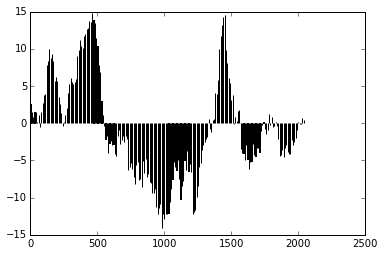

In [20]:
# READ DNA SEQUENCE FROM FASTA FILE
from Bio import SeqIO
with open("../data/human_beta_globin.fasta") as f:
    for record in SeqIO.parse(f, "fasta"):
        seq = record # there is only 1 record.
seq = str( seq.seq )

# INITIALIZE MATPLOTLIB FUNCTIONALITY
import matplotlib
%pylab inline
print "(Ignore any warnings...)"

# PREDICTION PARAMETERS
window = 120
overlap = 10

# COMPUTE AND PLOT PREDICTION
x = range(0, len(seq), overlap)
y = exon_predictor(seq, window, overlap)
bar ( x,y )

Hopefully you will see a plot like this

<img src="files/images/week3_exonintron.png" />

>If you get an error when running the code above you might not have ```matplotlib``` installed. On mac or linux run in a terminal: 

><cb>sudo pip install matplotlib</cb>

>Windows users should already have matplotlib installed from the pythonxy distribution.  

Compare the predicted exons with experimentally validated data

On this plot, it is easy to identify the three regions whose coding potential is positive. Check that those regions are the three real exons that were experimentally verified here: 

http://www.ebi.ac.uk/ena/data/view/V00499



The three validated exon regions are:

### 5. [Optional] Conditional Expressions (Advanced)

Python can make some rather nice *conditional expressions* in a single line using the syntax

    expression1 if condition else expression2

An example is:

In [21]:
type = "DNA"
bases = "ATCG" if type=="DNA" else "AUCG"
print bases

ATCG


make a one-line command that can print the average of a list using

    sum(A)/len(A)

However, if the list is empty it should print "N/A". Test it on these two lists:

In [22]:
A = [1,2,3,4]
B = []

In [24]:
# Make one-liner here and try it with A and B.
print sum(A)/len(A) if len(A)>0 else "N/A"
print sum(B)/len(B) if len(B)>0 else "N/A"

2
N/A


<img src="../pix/FinishFlag.jpg">
<br><br><br>

---

In [ ]:
from IPython.core.display import HTML


def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()